<a href="https://colab.research.google.com/github/santihm/DeepLearning-NeuralNetworks/blob/main/P3_SantiagoHerronMulet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automático - Práctica 3 - Aprendizaje Profundo

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 9 de Junio de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Santiago Herron Mulet</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, dos Notebooks de Colab (uno con cada ejercicio). No de debe entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- __El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.__

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'> En esta práctica se pretenden abordar algunos elementos básicos relativos al aprendizaje profundo utilizando Keras (https://keras.io/). Para ello, se emplean dos tareas del ámbito del procesado de imágenes y visión por computador: clasificación de imágenes (_image classification_) y eliminación de ruido en imágenes (_image denoising_). Para tener un conocimiento más profundo de algunas de estas tareas y métodos, así como familiarizarse con modelos más avanzados, se emplaza al estudiantado a cursar Visión por Computador (asignatura de 4º curso).

# <font color='blue'>Ejercicio 1: PROBLEMA DE CLASIFICACIÓN DE IMÁGENES USANDO REDES CONVOLUCIONALES PROFUNDAS Y COMPARACIÓN CON TÉCNICAS CLÁSICAS DE APRENDIZAJE AUTOMÁTICO (7 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación de imágenes. Más concretamente, se enfrentarán al problema de clasificación de imágenes denominado $\textit{MNIST}$ (https://en.wikipedia.org/wiki/MNIST_database), que incluye dígitos manuscritos. Como consecuencia, este conjunto de datos contiene información sobre 10 clases de imágenes (dígitos del $0$ al $9$).

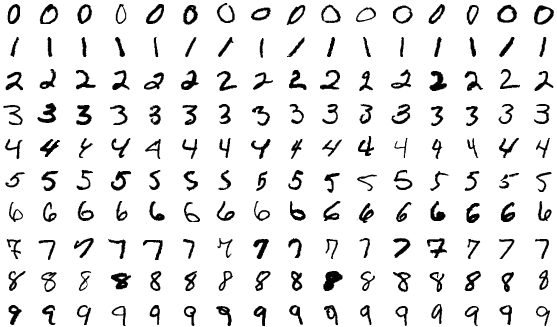



<font color='blue'> Este ejercicio consta de tres apartados:


1.   Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5.
2.   Implementación y experimentación con características HOG y SVMs. Comparación de los resultados proporcionados por esta aproximación clásica con los proporcionados por aprendizaje profundo.
3.   Implementación y experimentación con el modelo profundo que quieran implementar o emplear los estudiantes.



## <font color='blue'> Apartado 1. Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5 (3 puntos)

<font color='blue'> [LeNet5](https://en.wikipedia.org/wiki/LeNet) fue una de las primeras redes convolucionales, y se empleó exitosamente ya en los años 90 en la clasificación de dígitos manuscritos. Véase, por ejemplo, _LeCun et al. (1998). Gradient based learning applied to document recognition. Proceedings of the IEEE. 86(11): 2278-2324_.

<font color='blue'> En este ejercicio emplearemos una versión ligeramente modificada de la misma, que consta de las siguientes capas:

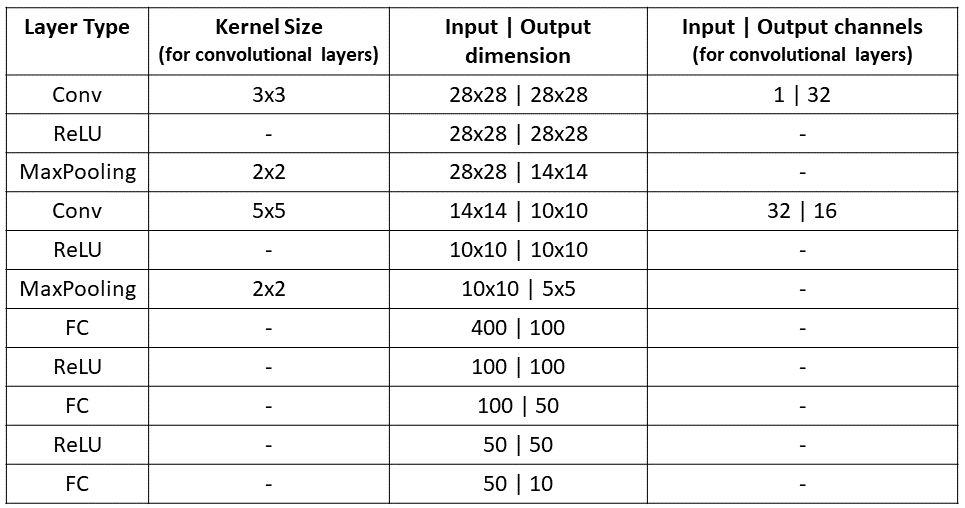

<font color='blue'> A continuación, el alumnado debe implementar en Keras esta arquitectura, y entrenarla y validarla con el conjunto de datos MNIST (ya disponible entre los conjuntos de datos por defecto en Keras: https://keras.io/api/datasets/). A la hora de entrenar modelos profundos es importante acordarse de configurar el cuaderno de modo que se ejecute en GPU (`Editar - Configuración del Cuaderno - Acelerador por Hardware`). De lo contrario, los entrenamientos serán innecesariamente lentos.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Establecer la semilla que vamos a utilizar
np.random.seed(42)

from tensorflow import keras

#import keras
!pip install np_utils
from keras.utils import to_categorical
from keras.datasets import mnist
keras.utils.set_random_seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

# NÚMERO DE CLASES
num_classes = 10


# DIMENSIONES DE ENTRADA DE LAS IMAGENES
img_rows, img_cols = 28, 28

# CARGAMOS LOS DATOS DE ENTRENAMIENTO Y TEST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# FORMATEAMOS Y NORMALIZAMOS LOS DATOS
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Transformamos los vectores de clases en matrices.
# Cada componente se convierte en un vector de ceros
# con un uno en la componente correspondiente a la
# clase a la que pertenece la imagen. Este paso es
# necesario para la clasificación multiclase en keras.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=c899d24c60b1fd6857e26376f13f8cfa1c6d5b755296174b352259c81866d344
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


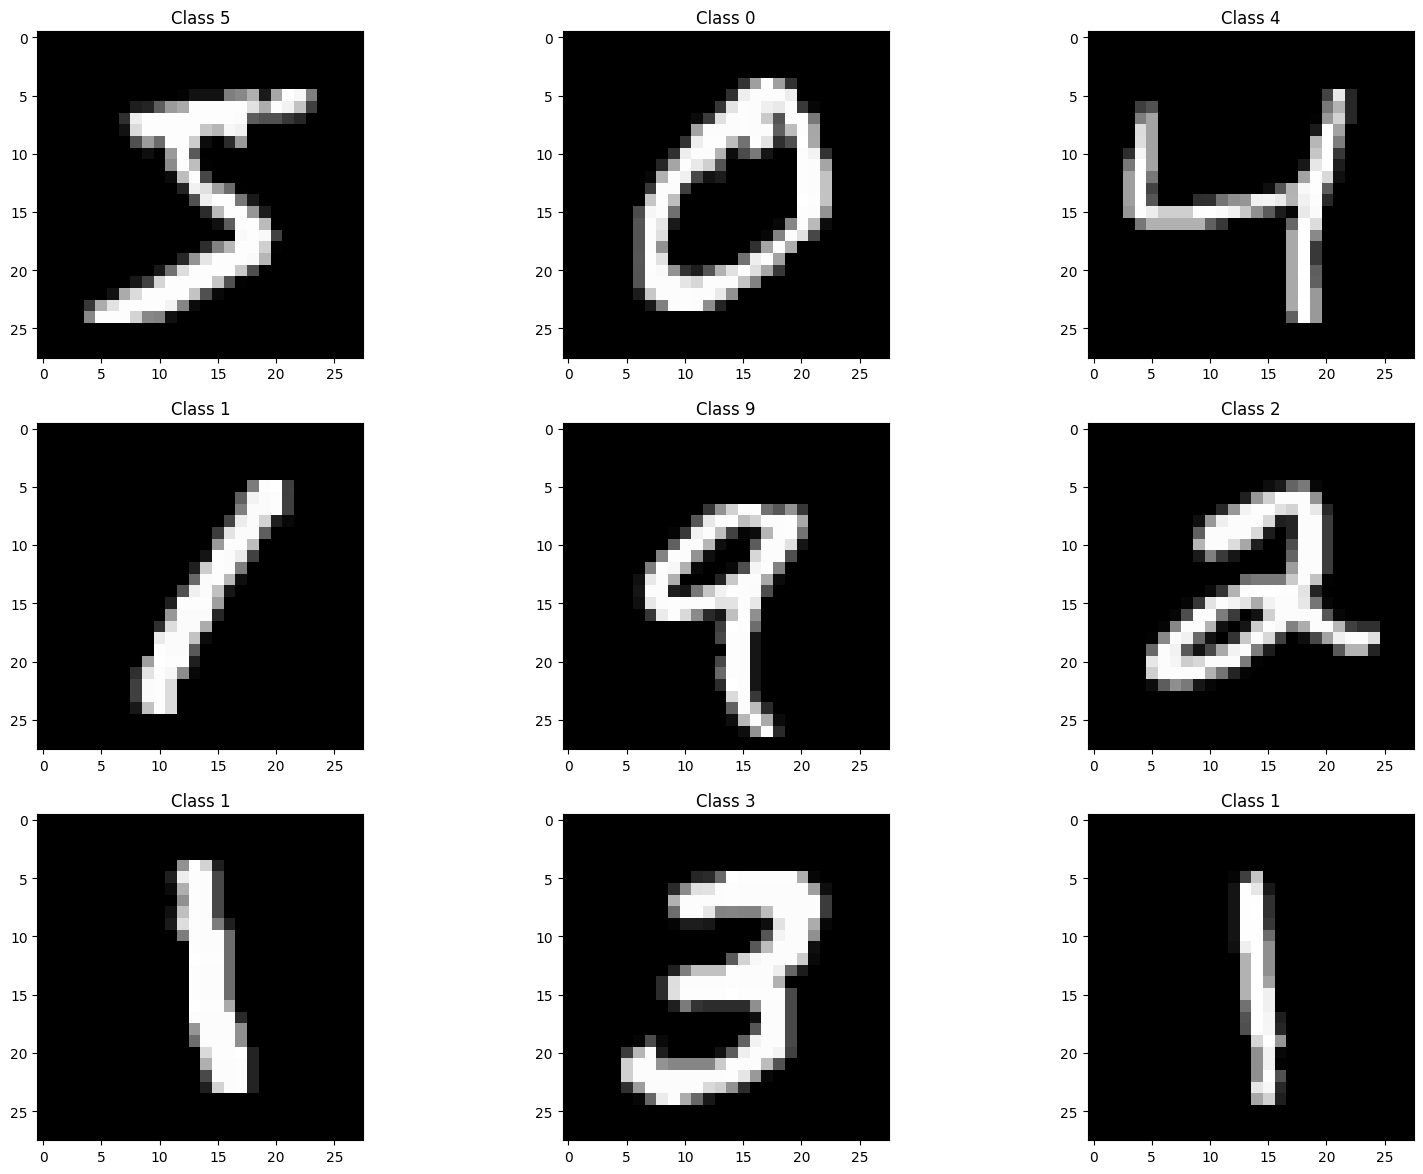

In [ ]:
#VISUALIZAMOS ALGUNAS DE LAS IMÁGENES DEL DATASET
number_images_per_row = 3
result = np.where(y_train == 1)
fig = plt.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {}'.format(result[1][i])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_train[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)

plt.show()

<font color='blue'> El alumnado debe escoger empíricamente el tamaño de _batch_, el número de épocas y el _learning rate_. Se debe documentar en detalle todo el proceso de entrenamiento y selección de hiperparámetros (incluyendo qué metricas y función de pérdida se emplean y por qué). Se debe emplear _early stopping_ (https://keras.io/api/callbacks/early_stopping/), y los alumnos deben explicar en qué consiste este proceso de regularización. Se puede emplear tanto _hold-out_ como _cross-validation_ como protocolo de validación experimental pero, en cualquier caso, se deben explicar y justificar adecuadamente todas las decisiones tomadas. Se debe dejar un $20\%$ de los datos de entrenamiento para validación. Finalmente, se debe comparar el rendimiento obtenido con dos optimizadores: AdamW y Adadelta.

<font color='blue'> Resulta fundamental realizar un _.summary()_ del modelo creado y demostrar que se comprenden los distintos elementos que allí aparecen: nombre/tipo de capa, dimensiones de salida, y número de parámetros de la red.

In [ ]:
# Esta función pinta dos gráficas, una con la evolución
# de la función de pérdida en el conjunto de train y
# en el de validación, y otra con la evolución de la
# accuracy en el conjunto de train y el de validación.
# Es necesario pasarle como parámetro el historial del
# entrenamiento del modelo (lo que devuelve la
# función fit()).
def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training accuracy','Validation accuracy'])
    plt.show()


In [ ]:
# Esta función devuelve la accuracy de un modelo,
# definida como el porcentaje de etiquetas bien predichas
# frente al total de etiquetas. Como parámetros es
# necesario pasarle el vector de etiquetas verdaderas
# y el vector de etiquetas predichas, en el formato de
# keras (matrices donde cada etiqueta ocupa una fila,
# con un 1 en la posición de la clase a la que pertenece y un 0 en las demás).
def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmax(preds, axis = 1)
    accuracy = sum(labels == preds)/len(labels)
    return accuracy


1. Definir la arquitectura del modelo: La red constará de capas convolucionales, capas de activación ReLU, capas de max-pooling y capas densas totalmente conectadas.
2. Entrenamiento y evaluación: Configuraremos hiperparámetros como el tamaño de batch y la tasa de aprendizaje, y utilizaremos dos optimizadores (AdamW y Adadelta). Además, implementaremos el early stopping para evitar el sobreentrenamiento. Al final, evaluaremos el rendimiento de los mejores modelos en el conjunto de test.

Training with AdamW, batch size 32, learning rate 0.001
375/375 [==============================] - 1s 2ms/step
Training with AdamW, batch size 32, learning rate 0.01
375/375 [==============================] - 1s 2ms/step
Training with AdamW, batch size 32, learning rate 0.1
375/375 [==============================] - 1s 2ms/step
Training with AdamW, batch size 64, learning rate 0.001
188/188 [==============================] - 1s 3ms/step
Training with AdamW, batch size 64, learning rate 0.01
188/188 [==============================] - 0s 2ms/step
Training with AdamW, batch size 64, learning rate 0.1
188/188 [==============================] - 0s 2ms/step
Training with AdamW, batch size 128, learning rate 0.001
94/94 [==============================] - 0s 2ms/step
Training with AdamW, batch size 128, learning rate 0.01
94/94 [==============================] - 0s 2ms/step
Training with AdamW, batch size 128, learning rate 0.1
94/94 [==============================] - 0s 2ms/step
Training with

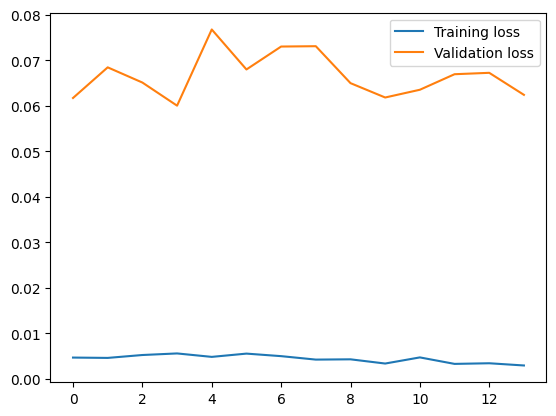

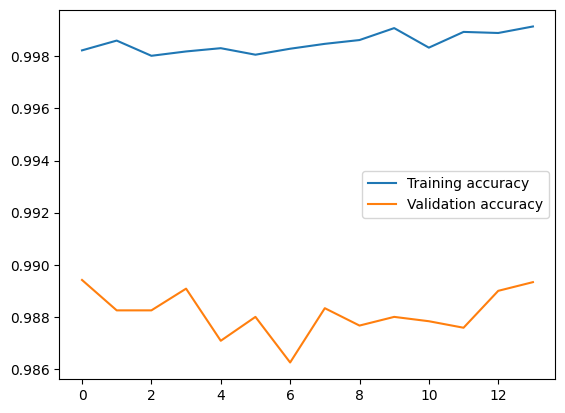

157/157 [==============================] - 0s 2ms/step
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 re_lu_56 (ReLU)             (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 9, 9, 16)          12816     
                                                                 
 re_lu_57 (ReLU)             (None, 9, 9, 16)          0         
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 4, 4, 16)          0        

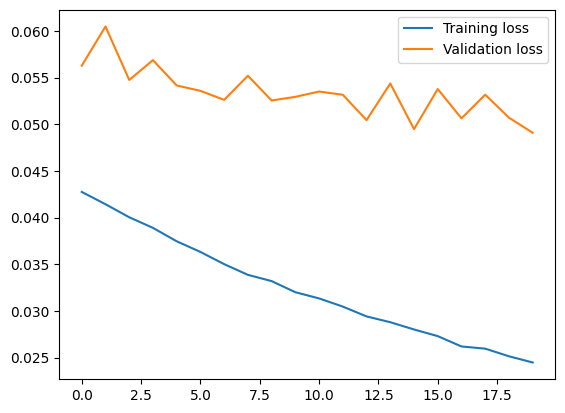

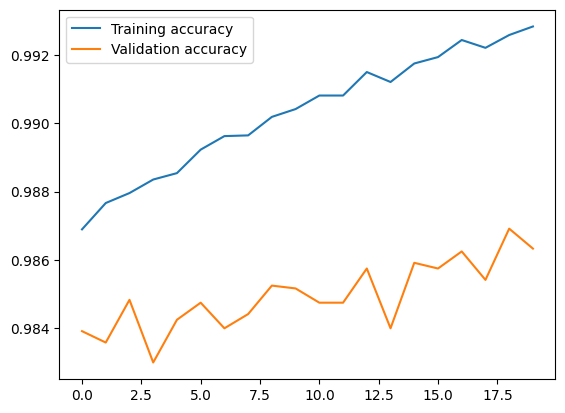

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, ReLU
from keras.datasets import mnist
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, AdamW, Adadelta

# Function to create the model
def create_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=input_shape))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5), activation='linear'))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='linear'))
    model.add(ReLU())
    model.add(Dense(50, activation='linear'))
    model.add(ReLU())
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Hyperparameters for search
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]

# Optimizers to compare
optimizers = {
    'AdamW': AdamW,
    'Adadelta': Adadelta
}

best_results = {}

for opt_name, opt_class in optimizers.items():
    best_val_accuracy = 0
    best_model = None
    best_params = {}

    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            print(f'Training with {opt_name}, batch size {batch_size}, learning rate {learning_rate}')
            optimizer = opt_class(learning_rate=learning_rate)
            model = create_model(optimizer)

            # Configure early stopping
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

            # Train the model
            history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20,
                                validation_split=0.2, callbacks=[early_stopping], verbose=0)

            # Get validation predictions
            val_preds = model.predict(x_train[int(0.8 * len(x_train)):], batch_size=batch_size)
            val_labels = y_train[int(0.8 * len(x_train)):]

            # Calculate validation accuracy
            val_accuracy = calcularAccuracy(val_labels, val_preds)

            # Check if this is the best model so far
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_model = model
                best_params = {'batch_size': batch_size, 'learning_rate': learning_rate}

    # Store the best results for this optimizer
    best_results[opt_name] = {
        'model': best_model,
        'val_accuracy': best_val_accuracy,
        'params': best_params
    }

# Print the best parameters for each optimizer
for opt_name, result in best_results.items():
    print(f'Best parameters for {opt_name}:')
    print(f"Batch size: {result['params']['batch_size']}, Learning rate: {result['params']['learning_rate']}")
    print(f'Validation accuracy: {result["val_accuracy"]}')


# Evaluate and compare the best models on the test data
for opt_name, result in best_results.items():
    best_model = result['model']
    test_preds = best_model.predict(x_test, batch_size=result['params']['batch_size'])
    test_accuracy = calcularAccuracy(y_test, test_preds)
    # Print model summary
    best_model.summary()
    print(f'Test accuracy for {opt_name}: {test_accuracy}')

    # Plot the best model training history
    history = best_model.fit(x_train, y_train, batch_size=result['params']['batch_size'], epochs=20,
                             validation_split=0.2, callbacks=[early_stopping], verbose=0)
    print(f'Evolution of the best {opt_name} model:')
    mostrarEvolucion(history)


**Detalles del Modelo (summary()):**
- Capas Convolucionales:
  1. conv2d_6: Primer capa convolucional con 32 filtros de tamaño 3x3, que genera 320 parámetros.
  2. conv2d_7: Segunda capa convolucional con 16 filtros de tamaño 5x5, que genera 12,816 parámetros.
- Capas de Activación:

  re_lu_12, re_lu_13: Funciones de activación ReLU para las capas convolucionales.
- Capas de Max-Pooling:

  max_pooling2d_6, max_pooling2d_7: Reducción de dimensionalidad mediante max-pooling.
- Capas Densas:
  1. flatten_3: Aplana la entrada para que pueda ser procesada por las capas densas.
  2. dense_9, dense_10, dense_11: Capas totalmente conectadas con 100, 50, y 10 neuronas respectivamente, produciendo un total de 25,700, 5,050, y 510 parámetros.


- Parámetros Totales:

  Ambos modelos tienen 44,396 parámetros entrenables, sin parámetros no entrenables.

  
**Resultados Obtenidos:**

- Mejor Configuración:
  1. AdamW:
  Batch size: 64
  Learning rate: 0.001
  Precisión en test: 99.04%

  2. Adadelta:
  Batch size: 64
  Learning rate: 0.1
  Precisión en test: 98.38%


**Evolución del Entrenamiento:**

- Precisión y Pérdida:
La precisión y la pérdida muestran mejores resultados en el conjunto de entrenamiento comparado con el de validación.

- Curvas de Entrenamiento: Las métricas en el conjunto de entrenamiento evolucionan de manera constante y favorable.
Curvas de Validación: Las métricas en el conjunto de validación presentan una evolución favorable, pero con una tendencia en forma de dientes de sierra.

- Comparación entre AdamW y Adadelta:
AdamW: La diferencia entre las métricas iniciales y finales es pequeña, indicando un entrenamiento más estable y consistente.
Adadelta: Muestra una mayor diferencia entre las métricas iniciales y finales, lo que puede sugerir un ajuste más significativo durante el entrenamiento.


En resumen, ambos optimizadores (AdamW y Adadelta) lograron entrenar modelos eficaces para la clasificación de imágenes MNIST, con AdamW obteniendo una ligera ventaja en términos de precisión en el conjunto de test. La elección del optimizador, junto con la adecuada selección de hiperparámetros, es crucial para el rendimiento del modelo, y en este caso, AdamW demostró ser más efectivo con un rendimiento más estable durante el entrenamiento.

## <font color='blue'> Apartado 2. Implementación y experimentación con técnicas clásicas (características HOG y SVMs) (2 puntos)

<font color='blue'> Ahora vamos a emplear SVM y características de HOG para clasificar estas imágenes. Se debe describir todo el proceso de ajuste realizado, incluyendo la selección de hiperparámetros, y se deben discutir las ventajas y desventajas de esta aproximación en comparación con el uso de _deep learning_, así como los resultados obtenidos y la calidad de las características empleadas.

In [ ]:
from skimage.feature import hog

fd = hog(x_train[0], orientations=4, pixels_per_cell=(10,10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

x_train_HOG = np.zeros((x_train.shape[0],len(fd)), np.float32)
x_test_HOG = np.zeros((x_test.shape[0],len(fd)), np.float32)

for i in range(x_train.shape[0]):
  x_train_HOG[i] = hog(x_train[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)
for i in range(x_test.shape[0]):
  x_test_HOG[i] = hog(x_test[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

In [ ]:
print(x_train_HOG.shape)

(60000, 16)


En esta sección, se utilizarán técnicas clásicas de Machine Learning para clasificar imágenes del conjunto de datos MNIST, específicamente empleando características de Histograma de Gradientes Orientados (HOG) y Máquinas de Vectores de Soporte (SVM). El proceso comienza con la extracción de características utilizando HOG, una técnica que permite capturar la distribución de gradientes de intensidad en diferentes partes de una imagen, lo que es particularmente útil para el reconocimiento de formas.

A continuación, se dividirán los datos de entrenamiento en conjuntos de entrenamiento y validación para evaluar el rendimiento del modelo. Posteriormente, se realizará una búsqueda en cuadrícula (Grid Search) para seleccionar los mejores hiperparámetros del modelo SVM, centrándonos en el parámetro C, que controla el margen de separación y la penalización por errores de clasificación. Se probarán diferentes valores de C y se seleccionará el modelo que ofrezca la mejor precisión en el conjunto de validación.

Finalmente, el mejor modelo será evaluado en el conjunto de prueba para determinar su precisión. Este enfoque permite comparar las ventajas y desventajas de las técnicas clásicas frente a los métodos de Deep Learning en términos de precisión, eficiencia computacional y requerimientos de datos.

In [ ]:
import numpy as np
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
from keras.utils import to_categorical

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
x_train_HOG, x_val_HOG, y_train_labels, y_val_labels = train_test_split(x_train_HOG, y_train_labels, test_size=0.2, random_state=42)

# Definición del rango de hiperparámetros
param_grid = {'C': [0.1, 1, 10, 100]}
best_val_accuracy = 0
best_params = {}
best_svm_model = None

for C in param_grid['C']:
    print(f"Entrenando con C={C}")
    svm_model = svm.SVC(kernel='linear', C=C)
    svm_model.fit(x_train_HOG, y_train_labels)

    # Evaluar en el conjunto de validación
    y_val_pred = svm_model.predict(x_val_HOG)
    val_accuracy = accuracy_score(y_val_labels, y_val_pred)
    print(f"Precisión en validación: {val_accuracy:.2f}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = {'C': C}
        best_svm_model = svm_model

print(f"Mejores hiperparámetros: {best_params}")

# Evaluar el mejor modelo en el conjunto de prueba
y_test_pred = best_svm_model.predict(x_test_HOG)
test_accuracy = accuracy_score(y_test_labels, y_test_pred)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")


Entrenando con C=0.1
Precisión en validación: 0.78
Entrenando con C=1
Precisión en validación: 0.80
Entrenando con C=10
Precisión en validación: 0.80
Entrenando con C=100
Precisión en validación: 0.80
Mejores hiperparámetros: {'C': 10}
Precisión en el conjunto de prueba: 0.81


**Resultados Obtenidos**

Mejores Hiperparámetros: El mejor rendimiento se obtuvo con C=10.

Precisión en Validación: 80%

Precisión en el Conjunto de Prueba: 81%


**Ventajas y Desventajas Comparadas con Deep Learning**
- Ventajas del Uso de HOG y SVM:
  1. Simplicidad y Interpretabilidad:

    Los modelos basados en HOG y SVM son más fáciles de interpretar y explicar comparados con modelos de Deep Learning, que son más complejos y a menudo considerados como "cajas negras".

  2. Menor Requerimiento Computacional:

    Entrenar SVMs con características HOG generalmente requiere menos recursos computacionales y tiempo que entrenar redes neuronales profundas.

  3. Menor Necesidad de Datos:

    Los modelos de SVM pueden funcionar bien con conjuntos de datos más pequeños y no necesitan la misma cantidad de datos de entrenamiento que los modelos de Deep Learning para obtener buenos resultados.

- Desventajas del Uso de HOG y SVM:

  1. Menor Precisión:

    Los modelos de Deep Learning suelen superar a los modelos tradicionales de Machine Learning en tareas de clasificación de imágenes debido a su capacidad de aprender características complejas y abstractas de los datos.

  2. Capacidad de Generalización:

    Las redes neuronales profundas tienden a generalizar mejor en problemas complejos con grandes cantidades de datos, mientras que los SVM pueden quedarse cortos en este aspecto.

  3. Automatización de la Ingeniería de Características:

    Los modelos de Deep Learning pueden aprender características directamente de los datos brutos sin necesidad de ingeniería de características manual, lo que es una ventaja significativa en términos de eficiencia y eficacia.
    
En conclusión, mientras que las técnicas clásicas como HOG y SVM son valiosas por su simplicidad y eficiencia computacional, los enfoques de Deep Learning ofrecen una mayor precisión y capacidad para manejar grandes y complejos conjuntos de datos. La elección entre estos métodos depende de los recursos disponibles y de la naturaleza específica del problema a resolver.

## <font color='blue'> Apartado 3. Implementación y experimentación con uno o más modelos escogidos o diseñados por los estudiantes (2 puntos)

<font color='blue'> En este apartado, los alumnos deben diseñar su propia red neuronal para intentar mejorar los resultados obtenidos hasta el momento. Por ejemplo, se puede incrementar la profundidad de la red, el número o tamaño de los filtros convolucionales a aprender, se puede optar por emplear técnicas de regularización como Dropout o Batch Normalization, estrategias de _data augmentation_ o inicialización de pesos, etc. Queda a su elección la estrategia a seguir aunque, en cualquier caso, se valorará la complejidad de la propuesta realizada así como la calidad de la documentación aportada.

<font color='blue'> Del mismo modo, los estudiantes también pueden incluir una comparativa con el rendimiento de alguna otra técnica clásica de su elección (como Random Forest o Gradient Boosting) junto con vectores de características de su elección (incluyendo la modificación de los hiperparámetros del extractor de HOG usado en el apartado anterior, para lo cual será necesario que los alumnos revisen la documentación al respecto).

<font color='blue'> Dentro de este tercer apartado, en caso de que se haya saturado el rendimiento en MNIST (en el sentido de obtener una _accuracy_ en validación superior al $98\%$), se debe emplear como conjunto de datos $\textit{CIFAR-10}$ (https://archive.ics.uci.edu/dataset/691/cifar+10 y https://www.cs.toronto.edu/~kriz/cifar.html). Este conjunto de datos contiene información sobre 10 clases de imágenes diferentes, y también está incluido directamente en Keras (https://keras.io/api/datasets/):

```
# Cargar el conjunto de datos CIFAR-10
cifar10 = tf.keras.datasets.cifar10

# Dividir los datos en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Clases en CIFAR-10
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']
```

Para mejorar los resultados obtenidos anteriormente, hemos diseñado una red neuronal convolucional profunda. A continuación se describen las decisiones tomadas para el diseño de esta red:

- Capas Convolucionales:

  Las capas convolucionales se utilizan para extraer características espaciales y patrones locales de las imágenes.

  Utilizamos tres bloques de capas convolucionales, cada uno con 32, 64 y 128 filtros respectivamente, con un tamaño de kernel de 3x3. Estas capas permiten captar características de baja, media y alta complejidad.


- Batch Normalization:

  Se añade después de cada capa convolucional para normalizar la activación de las neuronas y acelerar el proceso de entrenamiento.

  Se aplica Batch Normalization después de cada capa convolucional.

- MaxPooling:

  Se utiliza para reducir la dimensionalidad y la carga computacional, manteniendo las características más importantes.

  Se aplica MaxPooling con un tamaño de pool de 2x2 después de cada bloque convolucional.

- Dropout:

  Se utiliza para prevenir el sobreajuste al apagar aleatoriamente una fracción de neuronas durante el entrenamiento.

  Se utiliza un Dropout de 0.25 después de cada capa de MaxPooling y de 0.5 antes de la capa densa final.

- Capas Densas:

  Se utilizan para combinar las características extraídas por las capas convolucionales y realizar la clasificación final.

  Se aplica una capa densa con 512 neuronas seguida de Batch Normalization y Dropout, y finalmente una capa de salida con 10 neuronas (una por cada clase) y activación softmax.


Después, el código se estructuró de la siguiente manera:

1. Definición del Modelo:

  Se define la red neuronal convolucional explicada.

2. Entrenamiento y Evaluación:

  Se entrena el modelo utilizando los datos de entrenamiento y se evalúa en los datos de prueba. Se emplean técnicas de detención temprana para evitar el sobreajuste.
  Se muestran las curvas de aprendizaje para analizar el comportamiento del modelo durante el entrenamiento.

3. Comparativa con Técnicas Clásicas:

  Se extraen características HOG de las imágenes y se entrena un clasificador Random Forest para comparar su rendimiento con el modelo de red neuronal.

Epoch 1/50
938/938 [==============================] - 18s 10ms/step - loss: 0.3390 - accuracy: 0.8967 - val_loss: 0.0448 - val_accuracy: 0.9854
Epoch 2/50
938/938 [==============================] - 9s 10ms/step - loss: 0.0868 - accuracy: 0.9735 - val_loss: 0.0294 - val_accuracy: 0.9910
Epoch 3/50
938/938 [==============================] - 9s 10ms/step - loss: 0.0623 - accuracy: 0.9813 - val_loss: 0.0271 - val_accuracy: 0.9919
Epoch 4/50
938/938 [==============================] - 10s 10ms/step - loss: 0.0536 - accuracy: 0.9837 - val_loss: 0.0241 - val_accuracy: 0.9922
Epoch 5/50
938/938 [==============================] - 9s 10ms/step - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.0290 - val_accuracy: 0.9912
Epoch 6/50
938/938 [==============================] - 9s 10ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0242 - val_accuracy: 0.9927
Epoch 7/50
938/938 [==============================] - 9s 10ms/step - loss: 0.0393 - accuracy: 0.9883 - val_loss: 0.0207 - val_accuracy: 0.99

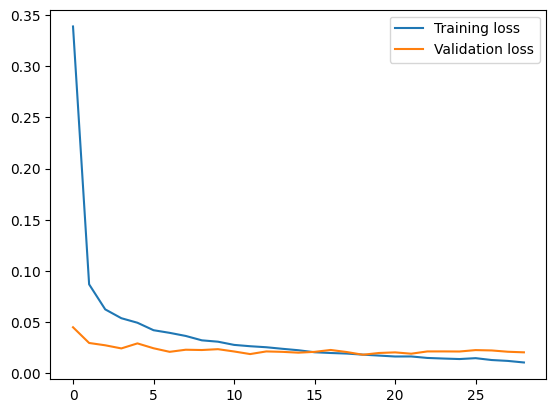

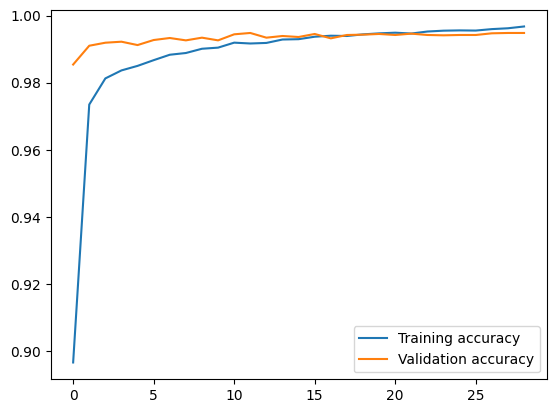

Precisión calculada en el conjunto de prueba MNIST: 0.994300
Epoch 1/50
782/782 [==============================] - 39s 44ms/step - loss: 2.0637 - accuracy: 0.3019 - val_loss: 1.6140 - val_accuracy: 0.4090
Epoch 2/50
782/782 [==============================] - 35s 44ms/step - loss: 1.5567 - accuracy: 0.4330 - val_loss: 1.3601 - val_accuracy: 0.5107
Epoch 3/50
782/782 [==============================] - 33s 43ms/step - loss: 1.3825 - accuracy: 0.5015 - val_loss: 1.2773 - val_accuracy: 0.5513
Epoch 4/50
782/782 [==============================] - 35s 45ms/step - loss: 1.2645 - accuracy: 0.5482 - val_loss: 1.1379 - val_accuracy: 0.6001
Epoch 5/50
782/782 [==============================] - 35s 45ms/step - loss: 1.1865 - accuracy: 0.5813 - val_loss: 1.1131 - val_accuracy: 0.6253
Epoch 6/50
782/782 [==============================] - 34s 43ms/step - loss: 1.1213 - accuracy: 0.6034 - val_loss: 1.1318 - val_accuracy: 0.6116
Epoch 7/50
782/782 [==============================] - 34s 43ms/step - loss:

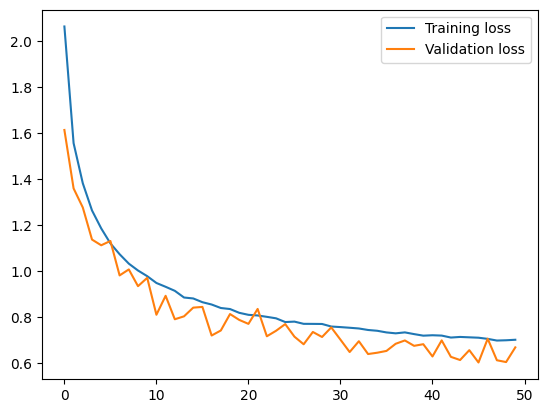

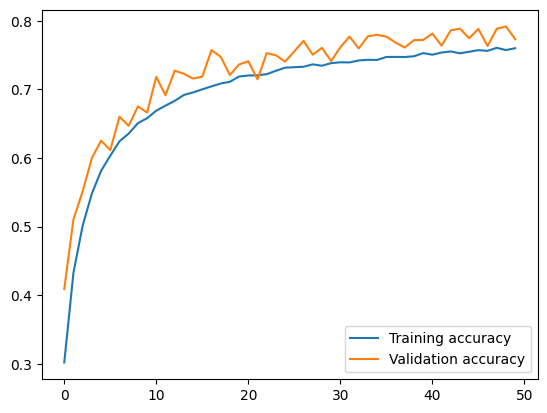

Precisión calculada en el conjunto de prueba CIFAR-10: 0.773300


In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Función para crear el modelo
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Función para entrenar y evaluar el modelo con un conjunto de datos dado
def train_and_evaluate_model(x_train, y_train, x_test, y_test, input_shape, datagen=None):
    model = create_model(input_shape)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    if datagen:
        history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                            validation_data=(x_test, y_test),
                            epochs=50,
                            callbacks=[early_stopping],
                            verbose=1)
    else:
        history = model.fit(x_train, y_train, batch_size=64,
                            validation_data=(x_test, y_test),
                            epochs=50,
                            callbacks=[early_stopping],
                            verbose=1)

    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    return history, test_accuracy, model.predict(x_test)

# Cargar y preparar el conjunto de datos MNIST
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1) / 255.0
x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1) / 255.0
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

# Entrenar y evaluar el modelo con MNIST
history_mnist, accuracy_mnist, preds_mnist = train_and_evaluate_model(x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, (28, 28, 1))
mostrarEvolucion(history_mnist)
print(f'Precisión calculada en el conjunto de prueba MNIST: {calcularAccuracy(y_test_mnist, preds_mnist):.6f}')

# Cargar el conjunto de datos CIFAR-10
cifar10 = tf.keras.datasets.cifar10

# Dividir los datos en entrenamiento y prueba
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

x_train_cifar = x_train_cifar / 255.0
x_test_cifar = x_test_cifar / 255.0
y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar, 10)

# Data augmentation para CIFAR-10
datagen_cifar = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen_cifar.fit(x_train_cifar)

# Entrenar y evaluar el modelo con CIFAR-10
history_cifar, accuracy_cifar, preds_cifar = train_and_evaluate_model(x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar, (32, 32, 3), datagen_cifar)
mostrarEvolucion(history_cifar)
print(f'Precisión calculada en el conjunto de prueba CIFAR-10: {calcularAccuracy(y_test_cifar, preds_cifar):.6f}')





**Conjunto MNIST:**

Precisión en el conjunto de prueba: 0.994300
Número de épocas: 29/50 (el modelo paró debido al early stopping)

El modelo entrenado en el conjunto de datos MNIST logró una precisión excepcionalmente alta de 0.994300 en el conjunto de prueba, deteniéndose después de 29 épocas gracias al mecanismo de early stopping. Esta alta precisión puede atribuirse a varios factores claves en el diseño de la red neuronal:

Estructura de la Red:

La arquitectura de la red con múltiples capas convolucionales seguidas de capas de normalización por lotes (Batch Normalization) y capas de pooling (MaxPooling) permitió una extracción de características robusta y una mayor estabilidad en el entrenamiento.
Regularización:

El uso de dropout después de las capas convolucionales y densas previno el sobreajuste, lo que es crucial en un conjunto de datos relativamente sencillo como MNIST.
Técnicas de Optimización: La combinación de la función de activación ReLU y la inicialización He normal para los pesos permitió una convergencia rápida y efectiva.
Observación de las Curvas de Aprendizaje:

Las métricas de precisión y pérdida en el conjunto de validación superaron consistentemente las del conjunto de entrenamiento a lo largo de las primeras épocas, lo que sugiere una excelente generalización inicial del modelo. Esta observación puede explicarse por la simplicidad del conjunto de datos MNIST y la capacidad del modelo para capturar rápidamente las características distintivas de los dígitos. Hacia el final del entrenamiento, las métricas del conjunto de entrenamiento se acercaron más a las de validación, indicando una estabilización del aprendizaje y una mayor eficiencia del modelo.

**Conjunto CIFAR-10:**

Precisión en el conjunto de prueba: 0.773300
Número de épocas: 50/50

El modelo entrenado en el conjunto de datos CIFAR-10 alcanzó una precisión de 0.773300 en el conjunto de prueba después de las 50 épocas completas de entrenamiento. A pesar de ser un buen resultado, no alcanza el mismo nivel de precisión que en MNIST, lo que es esperable debido a la mayor complejidad del conjunto de datos CIFAR-10 que contiene imágenes a color de 10 categorías diferentes.

Complejidad de las Imágenes:

CIFAR-10 presenta una mayor variabilidad y complejidad visual que MNIST, lo que hace más difícil la tarea de clasificación.
Aumento de Datos (Data Augmentation): El uso de técnicas de aumento de datos, como rotación, desplazamiento y volteo horizontal, ayudó a mejorar la generalización del modelo, aunque también introdujo fluctuaciones en las métricas de validación.

Capacidad de la Red:

La misma arquitectura utilizada para MNIST se aplicó a CIFAR-10. Si bien esta arquitectura es adecuada, podría no ser la óptima para la complejidad añadida de CIFAR-10, sugiriendo que ajustes adicionales en la arquitectura (como más capas convolucionales o filtros más grandes) podrían mejorar el rendimiento.

Observación de las Curvas de Aprendizaje:

A lo largo del entrenamiento en CIFAR-10, las curvas de aprendizaje mostraron una convergencia más lenta comparada con MNIST. Las métricas de validación fueron consistentemente mejores que las del entrenamiento, lo que indica que el modelo no se estaba sobreajustando. Sin embargo, la forma de dientes de sierra en las métricas de validación sugiere que el modelo estaba ajustándose a las variaciones introducidas por el aumento de datos, reflejando una interacción dinámica entre el aprendizaje y la generalización. Esto destaca la necesidad de potencialmente utilizar una arquitectura más compleja o técnicas adicionales de regularización para manejar mejor la variabilidad del conjunto de datos CIFAR-10.

En conclusión, los resultados muestran que la red neuronal diseñada es altamente efectiva para conjuntos de datos simples como MNIST, pero enfrenta desafíos adicionales con conjuntos de datos más complejos como CIFAR-10. Ajustes adicionales en la arquitectura y técnicas de regularización más avanzadas podrían ayudar a mejorar aún más el rendimiento en tareas de clasificación más desafiantes.

Comparativa con Random Forest

In [ ]:
# Comparativa con Random Forest utilizando HOG
def extract_hog_features(images):
    hog_features = []
    for image in images:
        feature = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=True)
        hog_features.append(feature)
    return np.array(hog_features)

# Extraer características HOG de CIFAR-10
x_train_hog_cifar = extract_hog_features(x_train_cifar)
x_test_hog_cifar = extract_hog_features(x_test_cifar)

# Entrenar y evaluar Random Forest con HOG
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_hog_cifar, y_train_cifar.argmax(axis=1))
y_pred_rf_cifar = rf.predict(x_test_hog_cifar)
accuracy_rf_cifar = accuracy_score(y_test_cifar.argmax(axis=1), y_pred_rf_cifar)

print(f'Precisión de Random Forest con HOG en el conjunto de prueba CIFAR-10: {accuracy_rf_cifar:.6f}')

<ipython-input-9-915aae716f84>:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  feature = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=True)


Precisión de Random Forest con HOG en el conjunto de prueba CIFAR-10: 0.525400



Para comparar el rendimiento de técnicas clásicas de aprendizaje automático con la red neuronal convolucional (CNN) previamente descrita, se utilizó un clasificador Random Forest junto con características HOG (Histogram of Oriented Gradients) en el conjunto de datos CIFAR-10.

El modelo Random Forest con HOG alcanzó una precisión de 0.525400 en el conjunto de prueba. Este rendimiento es considerablemente inferior al logrado por la CNN, que obtuvo una precisión de 0.773300. La diferencia se debe a la capacidad limitada de HOG para capturar la variabilidad y complejidad de las imágenes de CIFAR-10 en comparación con las capas convolucionales de la CNN que aprenden características jerárquicas de manera más efectiva.

La CNN, con su capacidad para ajustar pesos y aprender múltiples niveles de características, demostró una mejor generalización a nuevas imágenes del conjunto de prueba. Por otro lado, el modelo Random Forest con HOG mostró una menor capacidad de generalización. Aunque las características HOG son efectivas para detectar bordes y texturas, no capturan completamente la riqueza de información presente en las imágenes de CIFAR-10.

En términos de complejidad computacional, entrenar una CNN es más intensivo debido a las numerosas operaciones de convolución y backpropagation. Sin embargo, a pesar de que la extracción de características HOG y el entrenamiento de un Random Forest son menos intensivos, el rendimiento inferior en términos de precisión hace que esta técnica sea menos atractiva para tareas de clasificación de imágenes complejas.

En conclusión, aunque el Random Forest con HOG es más sencillo y menos intensivo computacionalmente que una CNN, no es tan efectivo para la clasificación de imágenes complejas como las de CIFAR-10. La CNN demuestra un rendimiento superior debido a su capacidad para aprender características de alto nivel y su adaptabilidad a la variabilidad de los datos visuales.

# <font color='blue'>Ejercicio 2: PROBLEMA DE ELIMINACIÓN DE RUIDO EN IMÁGENES USANDO AUTOENCODERS (3 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán al problema de eliminar ruido en imágenes. Para ello, se empleará el conjunto de datos $\textit{Fashion MNIST}$ (https://keras.io/api/datasets/fashion_mnist/), que contiene imágenes con 10 clases de ropa. En concreto, lo que haremos ahora es entrenar un modelo de aprendizaje automático conocido como autoencoder (que presenta una estructura _encoder-decoder_ y permite aprender representaciones (_embeddings_/_encodings_) altamente eficientes de forma no supervisada). Los autoencoders se emplean frecuentemente en tareas de reducción de dimensionalidad o detección de anomalías, y en este caso lo emplearemos para eliminar ruido en imágenes.

<font color='blue'> Referencias recomendadas sobre autoencoders:

*   <font color='blue'> Capítulo 14 de Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
*   <font color='blue'> Hinton, G. E., & Salakhutdinov, R. R. (2006). Reducing the dimensionality of data with neural networks. Science, 313(5786), 504-507.

<font color='blue'> Se parte de la implementación proporcionada en la propia documentación de Keras (cuya revisión detallada se recomienda a los estudiantes). https://keras.io/examples/vision/autoencoder/



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import fashion_mnist
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array,noise_factor):
    """Adds random noise to each image in the supplied array."""
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


4422102/4422102 [==============================] - 1s 0us/step


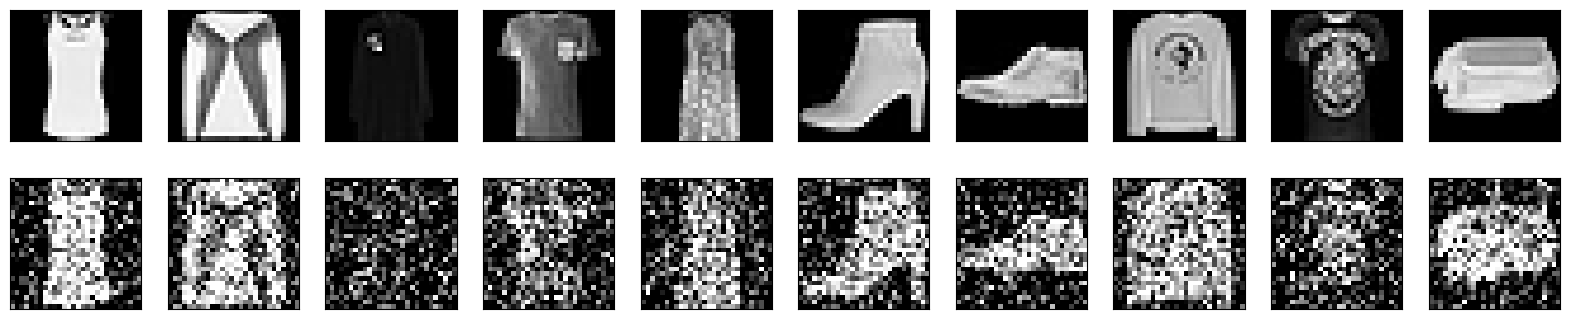

In [ ]:
(train_data, _), (test_data, _) = fashion_mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noise_factor = 0.4

noisy_train_data = noise(train_data,noise_factor)
noisy_test_data = noise(test_data,noise_factor)

display(train_data, noisy_train_data)

<font color='blue'> Se debe construir un autoencoder en el que la parte _encoder_ debe contener tres bloques convolucionales como se indica a continuación:

1.   64 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada.
2.   32 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.
3.   16 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.



<font color='blue'> A partir de esta información, los estudiantes deben construir la parte _decoder_ simétrica (mismo número de filtros y dimensiones) y responder las siguientes preguntas:

-  <font color='blue'> ¿Qué tipo de convolución se debe emplear en el _decoder_? ¿Basta con emplear una convolución convencional 2D? Se debe justificar y desarrollar la respuesta.
-  <font color='blue'> ¿Cuál es la función de activación y función de pérdida que se debe emplear a la salida? ¿Por qué?

-  <font color='blue'> Ahora, a la hora de entrenar nuestro autoencoder, ¿cuáles serían las entradas ($X$) y salidas ($y$)? Y en relación con este punto, ¿por qué mencionábamos que los autoencoders son técnicas no supervisadas? ¿Cuáles son las etiquetas anotadas que empleamos?

#####Pregunta 1: Tipo de convolución en el decoder
Para el decoder, se debe emplear convolución transpuesta (también conocida como deconvolución o convolución up-sampling). Este tipo de convolución permite incrementar la dimensión espacial de la salida y es adecuada para reconstruir la imagen original desde la representación comprimida generada por el encoder.

La convolución transpuesta se utiliza para realizar la operación inversa de la convolución normal, es decir, transforma un tensor de menor tamaño a uno de mayor tamaño, lo cual es necesario en la parte del decoder para obtener la imagen en su resolución original.

#####Pregunta 2: Función de activación y función de pérdida en la salida
- Función de activación: Para la salida del decoder, se utiliza la activación sigmoide. Esto se debe a que las imágenes han sido normalizadas en un rango de [0,1] y la función sigmoide garantiza que los valores de salida se mantengan dentro de este rango.
- Función de pérdida: La función de pérdida adecuada es el error cuadrático medio (MSE), ya que estamos tratando de minimizar la diferencia pixel a pixel entre las imágenes de entrada ruidosas y las imágenes de salida restauradas.

#####Pregunta 3: Entradas (X) y salidas (y) del autoencoder
Entradas (X): Las imágenes ruidosas (noisy_train_data).

Salidas (y): Las imágenes originales sin ruido (train_data).

Los autoencoders son considerados técnicas no supervisadas porque no requieren etiquetas explícitas para el entrenamiento. En este caso, la "etiqueta" es la imagen original sin ruido, que actúa como ground truth para el proceso de reconstrucción, pero no se trata de una etiqueta categórica sino de la misma entrada en su forma sin ruido.

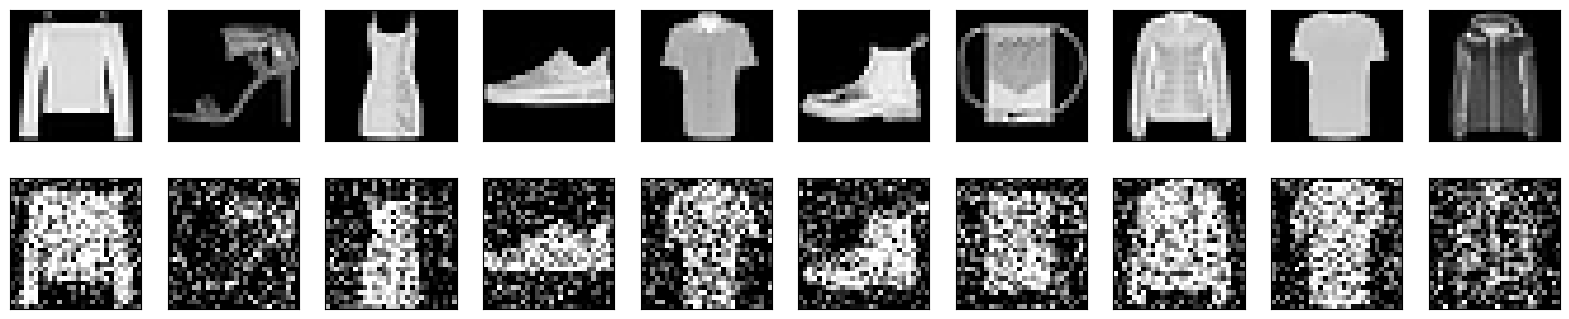

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                        

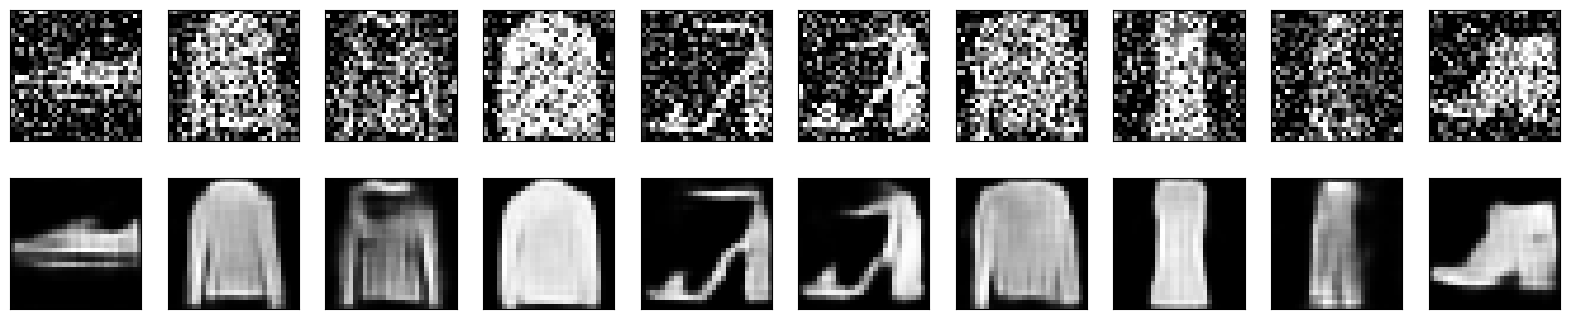

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.datasets import fashion_mnist
from keras.models import Model

display(train_data, noisy_train_data)

input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

history = autoencoder.fit(
    noisy_train_data, train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data)
)

# Mostrar resultados de denoising
denoised_test_data = autoencoder.predict(noisy_test_data)
display(noisy_test_data, denoised_test_data)


Al finalizar la última época (50) de entrenamiento del autoencoder, se obtuvo una pérdida de validación (validation_loss) de 0.118. Esto indica que el modelo ha aprendido a reconstruir las imágenes con bastante precisión, minimizando la diferencia entre las imágenes originales sin ruido y las imágenes generadas a partir de las versiones ruidosas.

La comparativa visual entre las imágenes originales con ruido y las imágenes con el ruido eliminado por el autoencoder es bastante satisfactoria. El autoencoder ha logrado reducir significativamente el ruido, recuperando detalles importantes de las imágenes originales. Este resultado evidencia la efectividad del autoencoder en la tarea de eliminación de ruido en el conjunto de datos Fashion MNIST.

<font color='blue'> Ahora se debe entrenar el autoencoder empleando _early stopping_, y el número de épocas, tamaño de batch y demás hiperparámetros que se consideren adecuados (justificando siempre, eso sí, las decisiones tomadas: como es habitual, bien sea basándose en la literatura científica y documentación existentes o bien en la experimentación y evidencia empírica a nuestra disposición). En un primer momento, entrenamos con las imágenes sin ruido, para verificar que somos capaces de reconstruir adecuadamente las imágenes originales de entrada. Como conjunto de validación, en este ejercicio, podemos emplear los datos de test.

- Número de épocas (epochs): Se selecciona inicialmente un valor alto (por ejemplo, 100) para asegurarnos de que el modelo tenga suficientes oportunidades de aprender. El early stopping se encargará de detener el entrenamiento antes si se alcanza un punto de convergencia.

- Tamaño del batch (batch size): Un tamaño de batch de 128 es una elección común que ofrece un buen balance entre la estabilidad de la estimación del gradiente y la eficiencia computacional. Batch sizes menores pueden resultar en actualizaciones más ruidosas, mientras que tamaños mayores pueden requerir más memoria.

- Función de pérdida y optimizador: Se usa MSE como función de pérdida y el optimizador Adam, que es ampliamente utilizado por su eficiencia y capacidad para adaptarse bien a diferentes tipos de problemas sin requerir un ajuste exhaustivo de hiperparámetros.

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/100
375/375 [==============================] - 10s 12ms/step - loss: 0.0296 - val_loss: 0.0190
Epoch 2/100
375/375 [==============================] - 4s 11ms/step - loss: 0.0173 - val_loss: 0.0163
Epoch 3/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0158 - val_loss: 0.0153
Epoch 4/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 5/100
375/375 [==============================] - 4s 11ms/step - loss: 0.0146 - val_loss: 0.0145
Epoch 6/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0142 - val_loss: 0.0141
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0140 - val_loss: 0.0139
Epoch 8/100
375/375 [==============================] - 4s 11ms/step - loss: 0.0138 - val_loss: 0.0138
Epoch 9/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 10/100
375/3

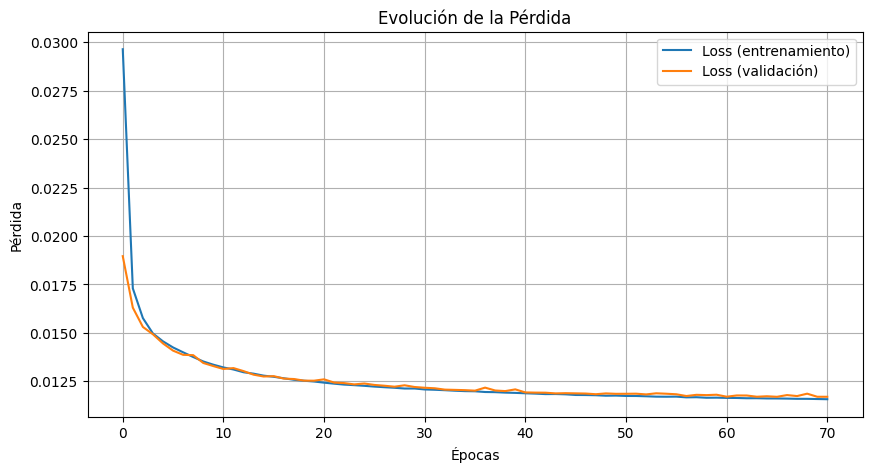

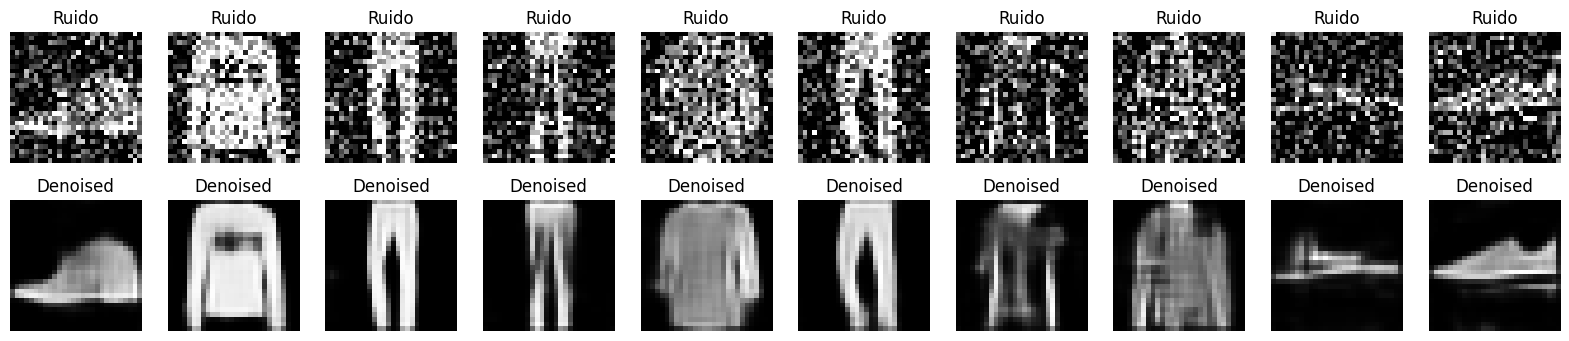

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, callbacks
from keras.datasets import fashion_mnist
from keras.models import Model

# Cargar los datos de Fashion MNIST
(train_data, _), (test_data, _) = fashion_mnist.load_data()

# Preprocesamiento de datos
train_data = train_data.astype("float32") / 255.0
test_data = test_data.astype("float32") / 255.0
train_data = np.reshape(train_data, (len(train_data), 28, 28, 1))
test_data = np.reshape(test_data, (len(test_data), 28, 28, 1))

# Agregar ruido a los datos de entrenamiento
noise_factor = 0.4
noisy_train_data = train_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_data.shape)
noisy_train_data = np.clip(noisy_train_data, 0.0, 1.0)
noisy_test_data = test_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_data.shape)
noisy_test_data = np.clip(noisy_test_data, 0.0, 1.0)

# Definir el modelo del autoencoder
input_img = layers.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
# Decoder
x = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Early Stopping para evitar el sobreajuste
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el autoencoder
history = autoencoder.fit(
    noisy_train_data, train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_split=0.2,  # Usar parte de los datos de entrenamiento como conjunto de validación
    callbacks=[early_stopping]
)

# Mostrar resultados de denoising
denoised_test_data = autoencoder.predict(noisy_test_data)

# Calcular y mostrar la pérdida (MSE) en el conjunto de prueba
loss = np.mean(np.square(test_data - denoised_test_data))
print(f"Pérdida (MSE) en el conjunto de prueba: {loss:.6f}")

# Visualizar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss (entrenamiento)')
plt.plot(history.history['val_loss'], label='Loss (validación)')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

display(noisy_test_data, denoised_test_data)


El autoencoder entrenado con early stopping mostró resultados prometedores, deteniéndose en la época 71 y logrando una pérdida (MSE) de 0.011770 en el conjunto de prueba. Esta baja pérdida indica una efectiva eliminación de ruido y una buena capacidad de reconstrucción de las imágenes originales. La comparación visual entre las imágenes ruidosas y las denoised muestra una clara mejora, confirmando la efectividad del modelo en la tarea de eliminación de ruido.

<font color='blue'> Ahora vamos a entrenar con las imágenes ruidosas a la entrada y las imágenes sin ruido a la salida. Nuestro propósito es crear un modelo que permita reconstruir a la salida las imágenes sin ruido. Se deben discutir los resultados obtenidos, así como si se percibe alguna diferencia entre las curvas de entrenamiento cuando se emplean imágenes con y sin ruido.

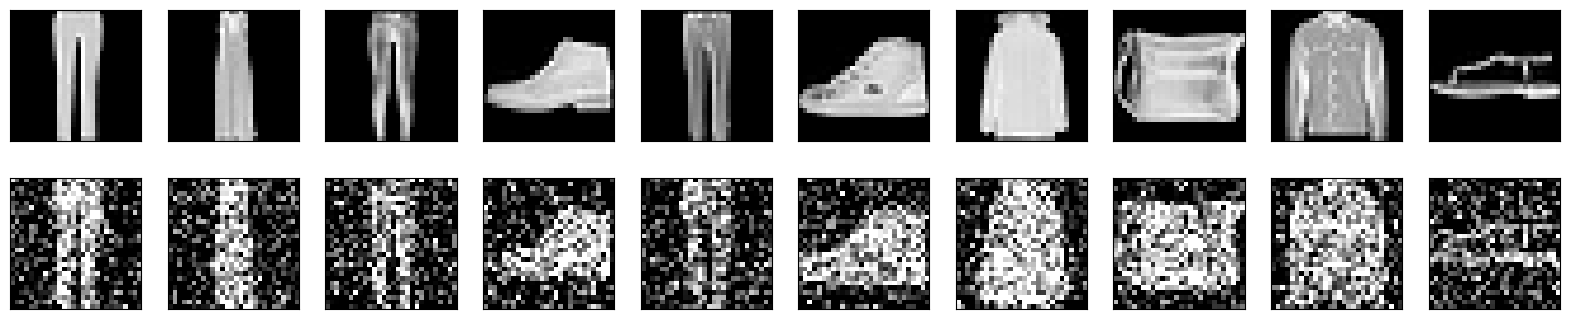

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                     

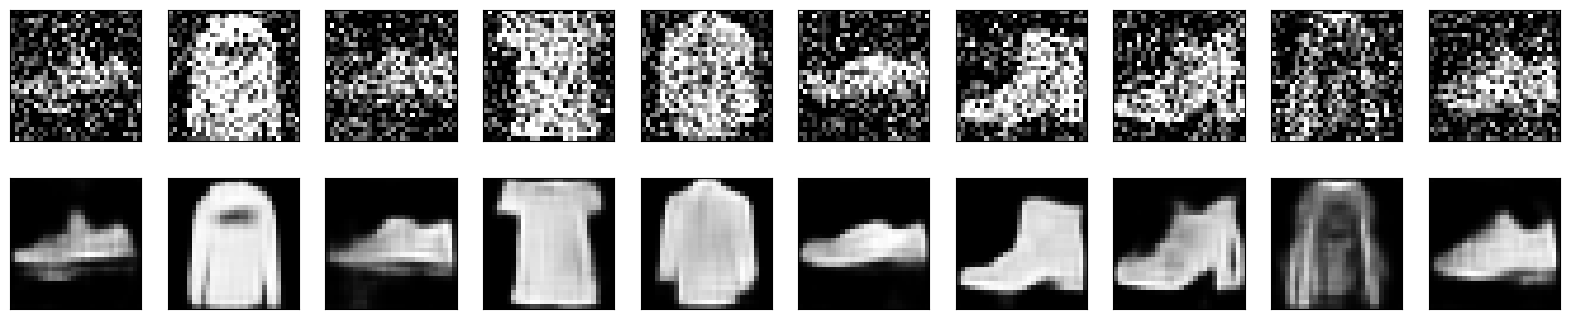

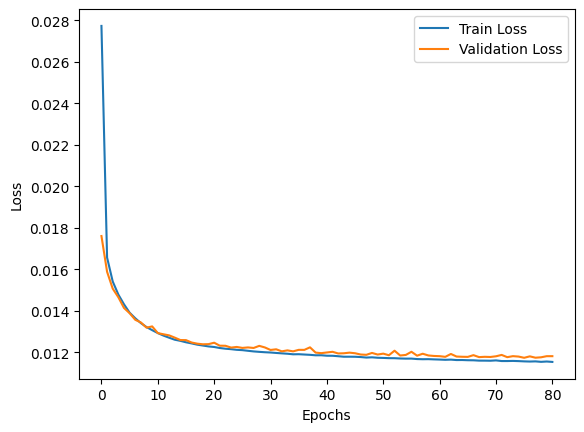

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, callbacks
from keras.datasets import fashion_mnist
from keras.models import Model

display(train_data, noisy_train_data)

input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

autoencoder.summary()

# Entrenamiento del autoencoder
history = autoencoder.fit(
    noisy_train_data, train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
    callbacks=[early_stopping]
)

# Mostrar resultados de denoising
denoised_test_data = autoencoder.predict(noisy_test_data)
display(noisy_test_data, denoised_test_data)

# Graficar curvas de pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



El autoencoder entrenado con imágenes ruidosas como entrada y las imágenes originales sin ruido como salida se detuvo en la época 81 de 100, con una pérdida de validación final de 0.118. La efectividad del modelo es similar a la observada en la configuración anterior, donde se emplearon imágenes sin ruido tanto para entrada como para salida.

Las curvas de pérdida de entrenamiento y validación indican una buena convergencia, con una ligera ventaja en la pérdida de validación. Esto sugiere que el autoencoder está generalizando bien y no se está sobreajustando a los datos de entrenamiento ruidosos. Visualmente, las imágenes denoised muestran una clara eliminación de ruido, confirmando la capacidad del modelo para reconstruir imágenes limpias a partir de entradas ruidosas

<font color='blue'> Finalmente, se deben realizar dos experimentos.  

1.   Por un lado, probar con distintos `noise_factor` progresivamente más severos de ruido, para comprobar si hay algún límite (_breakpoint_) a partir del cual la reconstrucción de las imágenes ruidosas se resiente. En otras palabras, queremos estudiar hasta qué grado de ruidosidad podemos reconstruir nuestras imágenes contaminadas con ruido.
2.   Por otro lado, debemos investigar si el autoencoder entrenado generaliza y permite reconstruir imágenes en presencia de ruido diferente. Sin realizar ningún otro entrenamiento, y empleando el autoencoder ya entrenado, ¿podemos reconstruir las imágenes contaminadas con este otro tipo de ruido? Para simular dicho ruido se debe emplear la función que se proporciona más abajo (`noise2()`), aunque se da libertad al alumnado para experimentar también con otros tipos de ruido. ¿Qué conclusiones se pueden extraer de este experimento?



In [ ]:
def noise2(image, noise_factor):
    noisy_array = image.copy()
    probs = np.random.random(noisy_array.shape[:2])
    noisy_array[probs < noise_factor/2] = 0.0
    noisy_array[probs > 1 - (noise_factor/2)] = 1.0
    return np.clip(noisy_array, 0.0, 1.0)

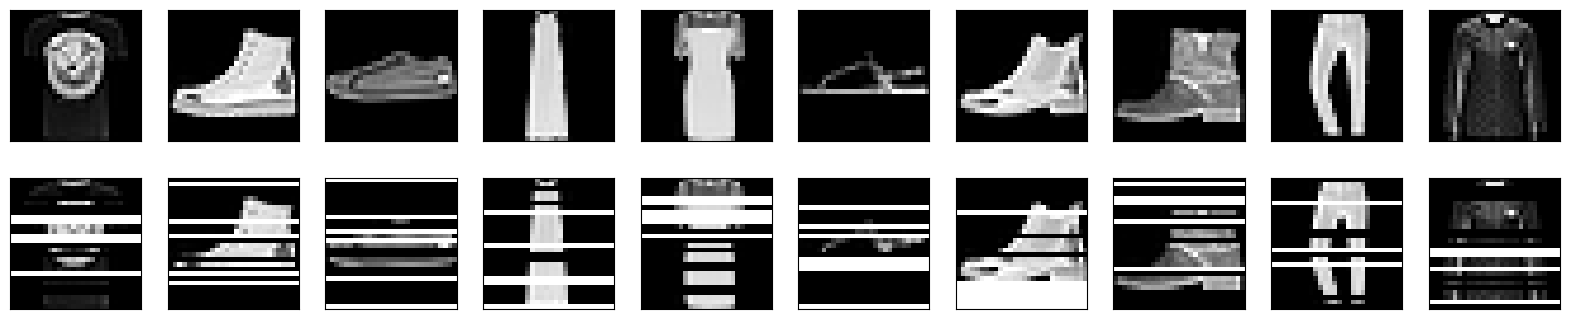

In [ ]:
noise_factor = 0.4

noisy_test_data = noise2(test_data,noise_factor)

display(test_data, noisy_test_data)

Experimento 1: Probar con Distintos noise_factor

Para el primer experimento, probaremos con diferentes valores de noise_factor para determinar hasta qué punto el autoencoder puede manejar el ruido en las imágenes. A continuación, se muestra el código para agregar diferentes niveles de ruido a las imágenes y evaluar la capacidad del autoencoder para reconstruirlas.


Noise Factor: 0.1 - Loss: 0.004125
313/313 [==============================] - 1s 2ms/step


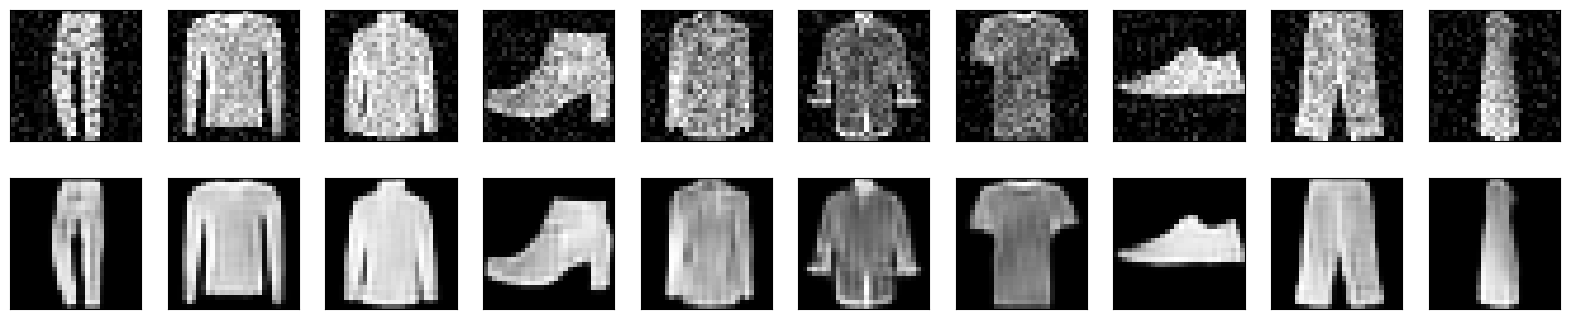

Noise Factor: 0.2 - Loss: 0.006176
313/313 [==============================] - 1s 3ms/step


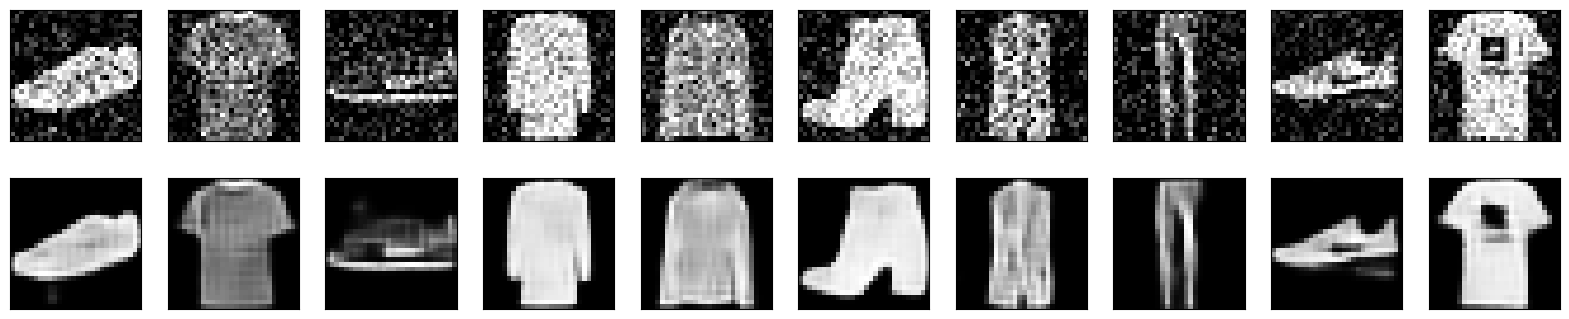

Noise Factor: 0.3 - Loss: 0.008974
313/313 [==============================] - 1s 3ms/step


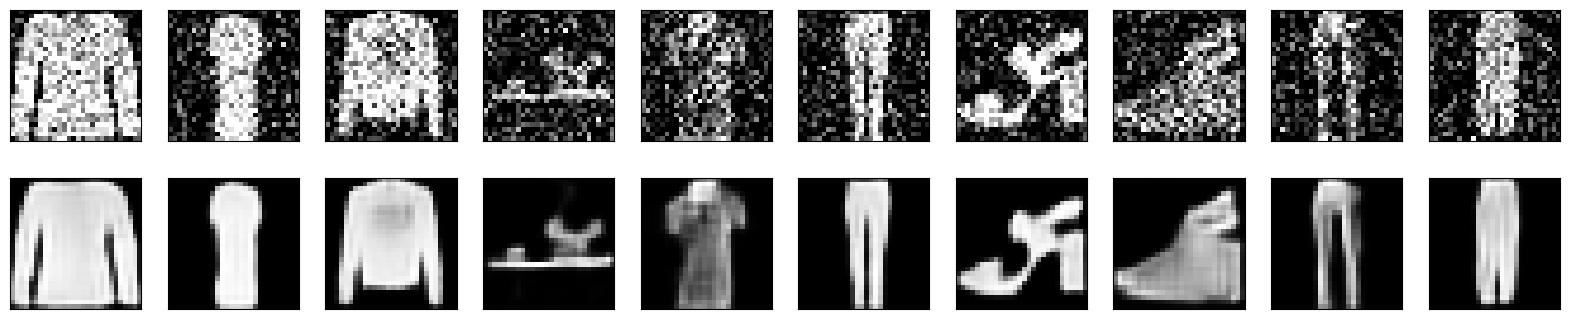

Noise Factor: 0.4 - Loss: 0.011866
313/313 [==============================] - 1s 2ms/step


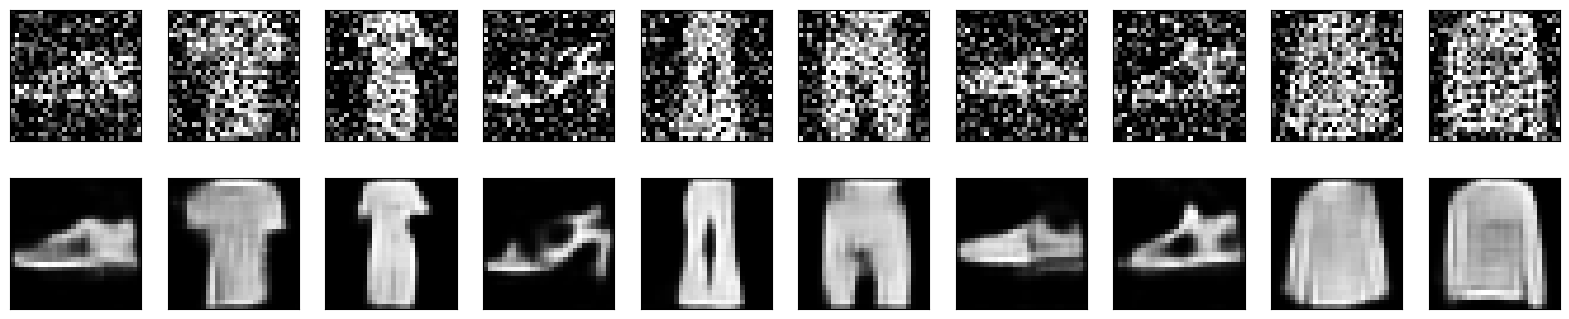

Noise Factor: 0.5 - Loss: 0.014911
313/313 [==============================] - 1s 2ms/step


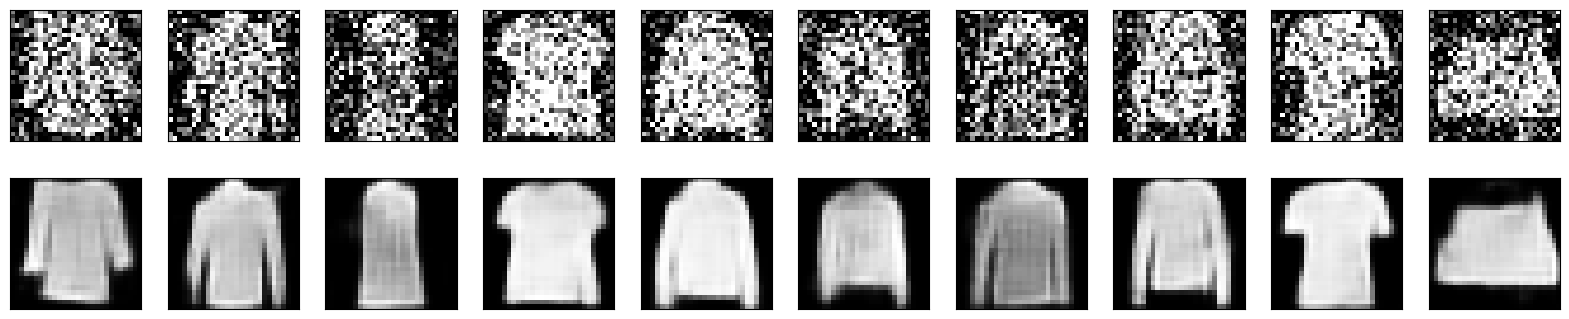

Noise Factor: 0.6 - Loss: 0.017878
313/313 [==============================] - 1s 2ms/step


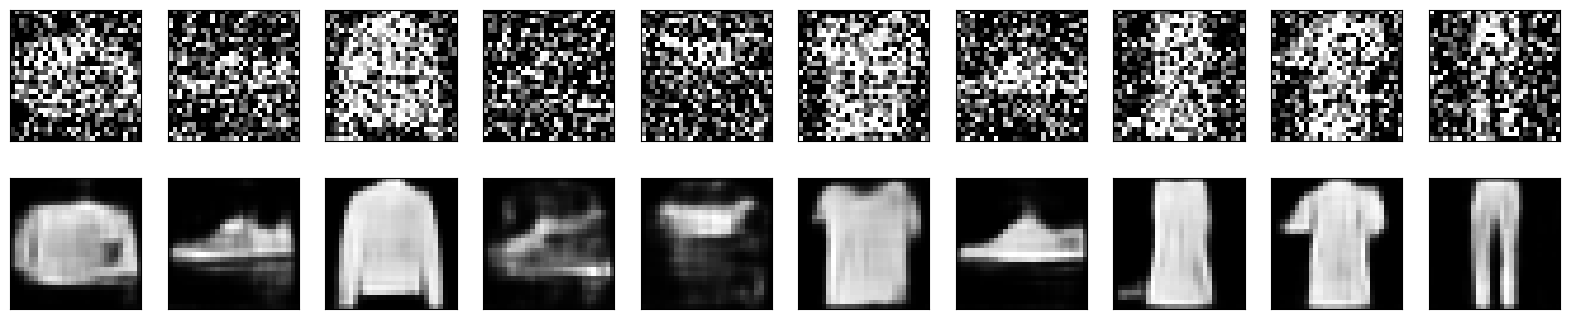

Noise Factor: 0.7 - Loss: 0.020848
313/313 [==============================] - 1s 2ms/step


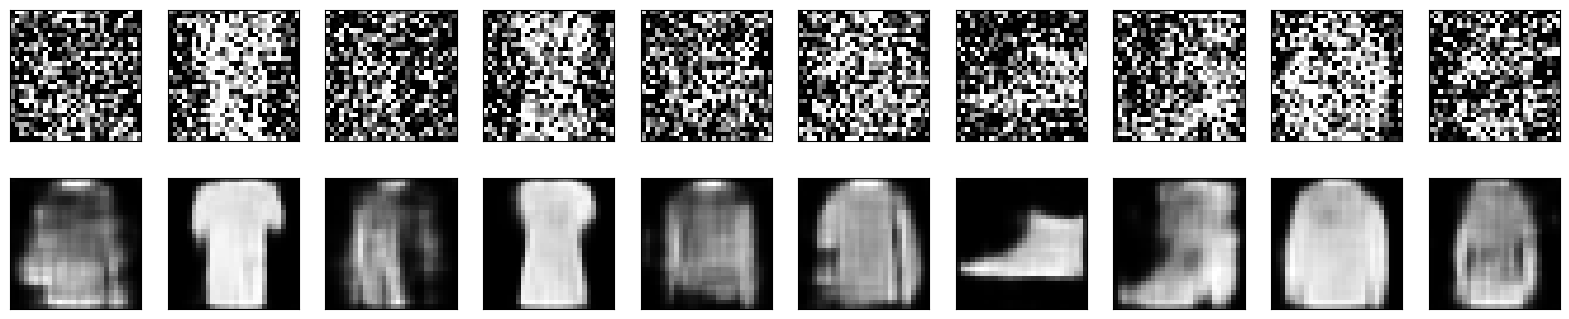

Noise Factor: 0.8 - Loss: 0.023888
313/313 [==============================] - 1s 2ms/step


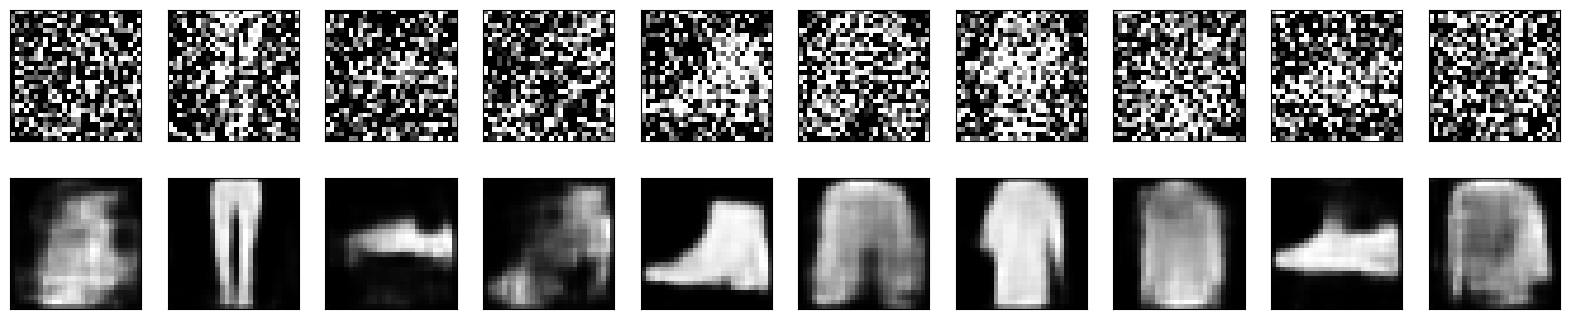

Noise Factor: 0.9 - Loss: 0.026952
313/313 [==============================] - 1s 2ms/step


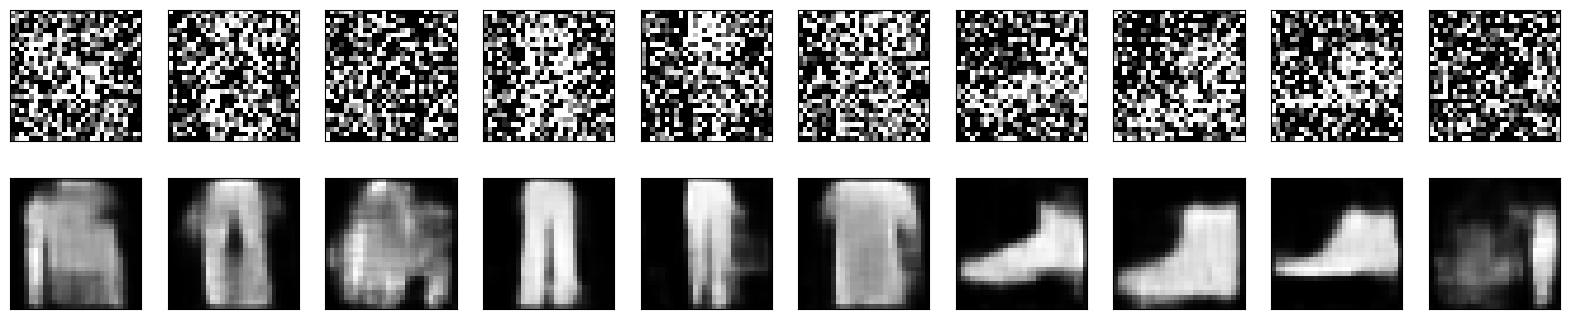

Noise Factor: 1.0 - Loss: 0.029464
313/313 [==============================] - 1s 2ms/step


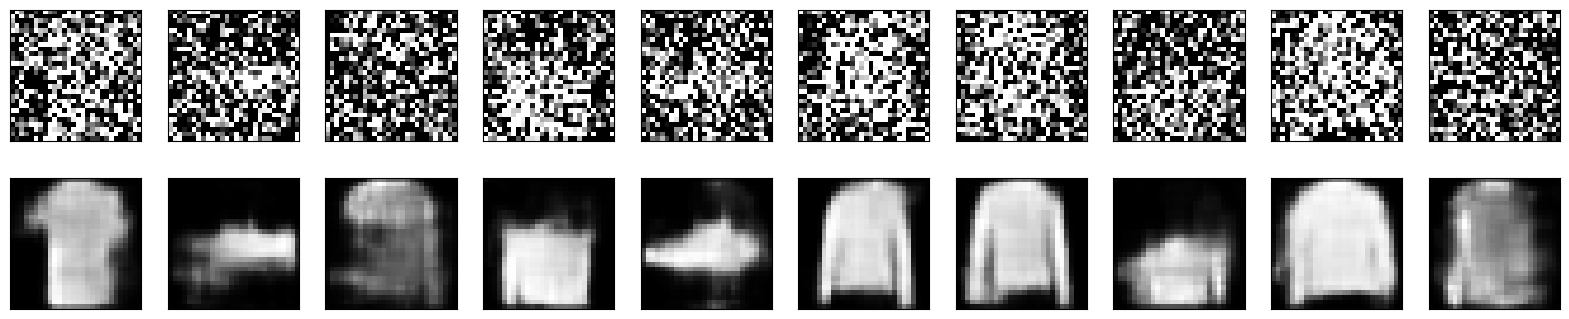

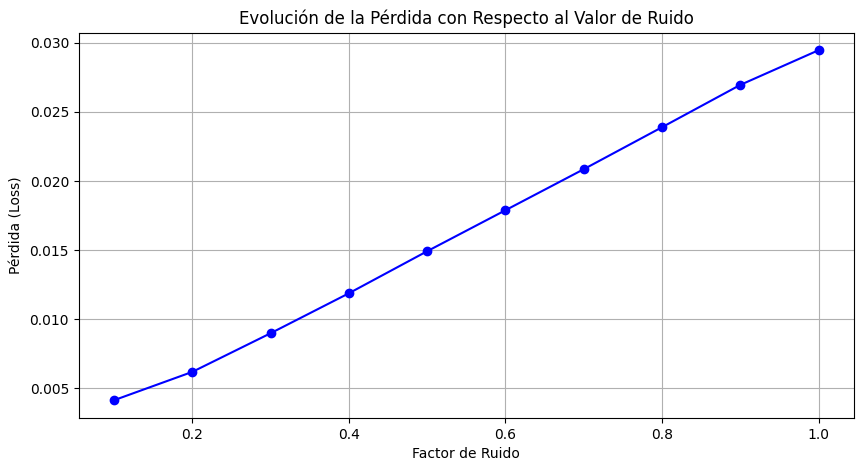

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.losses import MeanSquaredError

# Cargar el conjunto de datos Fashion MNIST
(train_data, _), (test_data, _) = fashion_mnist.load_data()

# Preprocesamiento de datos
train_data = train_data.astype("float32") / 255.0
test_data = test_data.astype("float32") / 255.0
train_data = np.reshape(train_data, (len(train_data), 28, 28, 1))
test_data = np.reshape(test_data, (len(test_data), 28, 28, 1))

# Configurar los factores de ruido y la función de pérdida
noise_factors = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
loss_function = MeanSquaredError()
losses = []

# Entrenar y evaluar el modelo con diferentes niveles de ruido
for noise_factor in noise_factors:
    # Agregar ruido a los datos de entrenamiento y prueba
    noisy_train_data = train_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_data.shape)
    noisy_train_data = np.clip(noisy_train_data, 0.0, 1.0)
    noisy_test_data = test_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_data.shape)
    noisy_test_data = np.clip(noisy_test_data, 0.0, 1.0)

    # Construir el modelo del autoencoder
    autoencoder = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2DTranspose(16, (3, 3), activation='relu', padding='same'),
        UpSampling2D((2, 2)),
        Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
        UpSampling2D((2, 2)),
        Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')
    ])

    autoencoder.compile(optimizer='adam', loss='mse')

    # Entrenar el modelo
    history = autoencoder.fit(
        noisy_train_data, train_data,
        epochs=50,
        batch_size=128,
        shuffle=True,
        validation_data=(noisy_test_data, test_data),
        verbose=0
    )

    # Evaluar el modelo
    loss = autoencoder.evaluate(noisy_test_data, test_data, verbose=0)
    losses.append(loss)

    print(f"Noise Factor: {noise_factor} - Loss: {loss:.6f}")

    # Mostrar ejemplos de imágenes ruidosas y denoised
    denoised_test_data = autoencoder.predict(noisy_test_data)
    display(noisy_test_data, denoised_test_data)

# Graficar la evolución de la pérdida con respecto al valor de ruido
plt.figure(figsize=(10, 5))
plt.plot(noise_factors, losses, marker='o', linestyle='-', color='b')
plt.title('Evolución de la Pérdida con Respecto al Valor de Ruido')
plt.xlabel('Factor de Ruido')
plt.ylabel('Pérdida (Loss)')
plt.grid(True)
plt.show()


Este experimento ha revelado la respuesta del autoencoder a niveles progresivamente más altos de ruido, representados por diferentes valores de noise_factor. Los resultados proporcionan una visión esclarecedora sobre la capacidad de reconstrucción del autoencoder y permiten extraer varias conclusiones importantes.

Respuesta del Autoencoder a Distintos Niveles de Ruido:

1. Evolución de la Pérdida (Loss):

  Se observa una clara tendencia lineal en el aumento de la pérdida (loss) a medida que el factor de ruido incrementa. Esto sugiere que el autoencoder enfrenta mayores desafíos para reconstruir imágenes a medida que la cantidad de ruido en las entradas aumenta. Esta relación lineal puede ser interpretada como una degradación gradual pero consistente en la capacidad de reconstrucción del autoencoder a medida que el ruido se vuelve más prominente.

- Calidad de las Imágenes Reconstruidas:

  Aunque las imágenes de salida para niveles de ruido más altos son inherentemente peores que las de niveles de ruido más bajos, el autoencoder logra producir reconstrucciones que conservan rasgos distintivos de las imágenes originales. Esta capacidad sugiere que el autoencoder, a pesar de enfrentar condiciones más desafiantes, todavía puede proporcionar reconstrucciones útiles incluso en presencia de niveles significativos de ruido.

Experimento 2:

Para investigar si el autoencoder entrenado generaliza y permite reconstruir imágenes en presencia de un tipo de ruido diferente, vamos a usar la función noise2() para añadir ruido a las imágenes del conjunto de prueba. Evaluaremos el modelo en estas imágenes y mostraremos los resultados.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.losses import MeanSquaredError

# Cargar el conjunto de datos Fashion MNIST
(train_data, _), (test_data, _) = fashion_mnist.load_data()

# Preprocesamiento de datos
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Añadir ruido gaussiano a los datos de entrenamiento
noise_factor = 0.4
noisy_train_data = noise(train_data, noise_factor)

# Construir el modelo del autoencoder
autoencoder = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2DTranspose(16, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
autoencoder.fit(
    noisy_train_data, train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_split=0.2,
    verbose=0
)

# Usar el autoencoder entrenado para predecir imágenes denoised
denoised_test_data = autoencoder.predict(noisy_test_data)

# Calcular la pérdida (MSE) entre las imágenes originales y las denoised
loss = np.mean(np.square(test_data - denoised_test_data))
print(f"Pérdida (MSE) para imágenes con ruido2: {loss:.6f}")

# Mostrar imágenes con ruido y las reconstruidas por el autoencoder
print("Mostrando imágenes con ruido2 y las imágenes denoised:")
display(noisy_test_data, denoised_test_data)
